# Building a simple Time to Rate system to test with

## Imports

In [2]:
from bsc_package import *

## Building a TDE population class

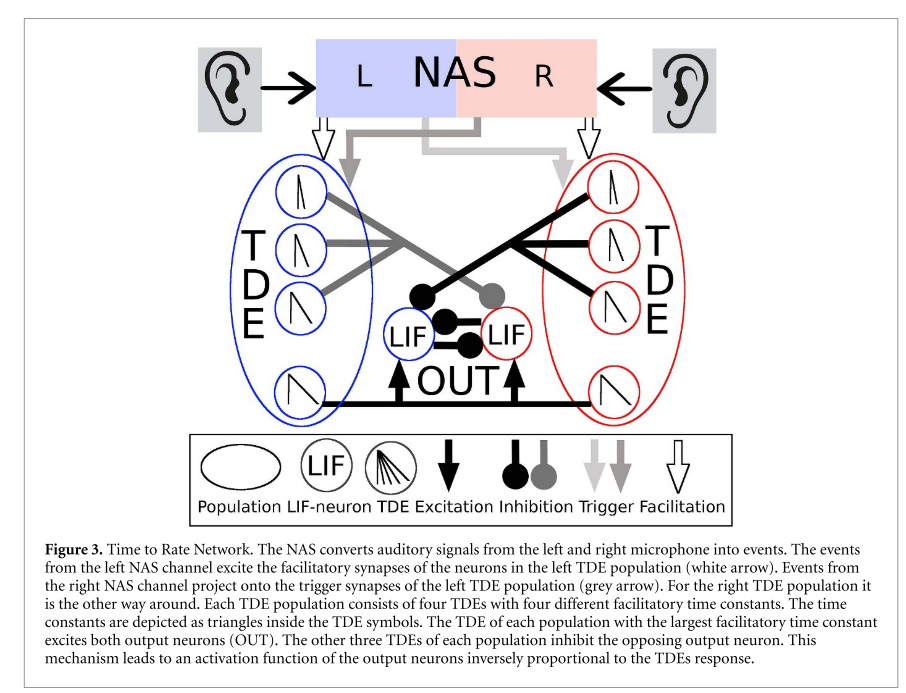

Following this figure from Schoepe2023, each frequency channel from the NAS is input into a population of four TDEs.   
Each TDE has a different time variable, meaning the steepness of the decay function varies between them.

Timing of this system, or any system regarding neuronal dynamics in python, is somewhat finnicky.  
It is unclear how accurate these models are since spikes aren't necessarily received by each element simultaneously.  
If this is a feature or a hindrance of python modelling is still unclear.

Regarding how inhibition works with integrate and fire neurons, here is a useful article:  

https://www.brainfacts.org/brain-anatomy-and-function/cells-and-circuits/2021/how-inhibitory-neurons-shape-the-brains-code-100621

Below is an attempt to design a class for the Time to Rate Network.

In [3]:
# class TimeToRate():

#     # This class employs a series of TDE elements and LIF elements. The resulting object will mimic one layer of the Time to Rate network described by Schoepe2023.

#     def __init__(self, tde_exp_init_val=3, 
#                         tde_exp_num_steps=40, 
#                         tde_exp_decay_fact=[0.5, 0.25, 0.125, 0.0625],                  
#                         LIF_params=[0.4, 0.819, 1],
#                         inhib_v=0.5, 
#                         excite_v=0.5, 
#                         lif_inhib_v=0.5) -> None:
        
#         self.lif_L = LiF(LIF_params)
#         self.lif_R = LiF(LIF_params)

#         ## Left TDE population
#         self.tde0_L = TDE([tde_exp_init_val, 
#                            tde_exp_decay_fact[0],
#                            tde_exp_num_steps], 
#                            LIF_params=LIF_params)
        
#         self.tde1_L = TDE([tde_exp_init_val, 
#                            tde_exp_decay_fact[1],
#                            tde_exp_num_steps], 
#                            LIF_params=LIF_params)
        
#         self.tde2_L = TDE([tde_exp_init_val, 
#                            tde_exp_decay_fact[2],
#                            tde_exp_num_steps], 
#                            LIF_params=LIF_params)
        
#         self.tde3_L = TDE([tde_exp_init_val, 
#                            tde_exp_decay_fact[3],
#                            tde_exp_num_steps], 
#                            LIF_params=LIF_params)


#         ## Right TDE population
#         self.tde0_R = TDE([tde_exp_init_val, 
#                            tde_exp_decay_fact[0],
#                            tde_exp_num_steps], 
#                            LIF_params=LIF_params)
        
#         self.tde1_R = TDE([tde_exp_init_val, 
#                            tde_exp_decay_fact[1],
#                            tde_exp_num_steps], 
#                            LIF_params=LIF_params)
        
#         self.tde2_R = TDE([tde_exp_init_val, 
#                            tde_exp_decay_fact[2],
#                            tde_exp_num_steps],
#                            LIF_params=LIF_params)
        
#         self.tde3_R = TDE([tde_exp_init_val, 
#                            tde_exp_decay_fact[3],
#                            tde_exp_num_steps], 
#                            LIF_params=LIF_params)
        
#         ## Excitatory and inhibitory voltages
#         self.inhib_v = inhib_v
#         self.excite_v = excite_v
#         self.lif_inhib_v = lif_inhib_v

#         ## The output of the two LIFs
#         self.left_out = 0
#         self.right_out = 0

    
#     def calculate_step(self, input_L, input_R):

#         # Run left TDE population

#         self.tde0_L.calculate(fac=input_L, trig=input_R)
#         self.tde1_L.calculate(fac=input_L, trig=input_R)
#         self.tde2_L.calculate(fac=input_L, trig=input_R)
#         self.tde3_L.calculate(fac=input_L, trig=input_R)

#             # If any of the first set of TDEs spikes, inhibit the left LIF by a predefined voltage
#         left_pop_inhib_voltage = self.inhib_v if (self.tde0_L.output or 
#                                                    self.tde1_L.output or 
#                                                    self.tde2_L.output) else 0 
        
#         # left_pop_inhib_voltage = self.inhib_v * np.sum([self.tde0_L.output, self.tde1_L.output, self.tde2_L.output]) 

        

#         # Run right TDE population

#         self.tde0_R.calculate(fac=input_R, trig=input_L)
#         self.tde1_R.calculate(fac=input_R, trig=input_L)
#         self.tde2_R.calculate(fac=input_R, trig=input_L)
#         self.tde3_R.calculate(fac=input_R, trig=input_L)

#             # If any of the first set of TDEs spikes, inhibit the right LIF by a predefined voltage
#         right_pop_inhib_voltage = self.inhib_v if (self.tde0_R.output or 
#                                                     self.tde1_R.output or 
#                                                     self.tde2_R.output) else 0
#         # right_pop_inhib_voltage = self.inhib_v * np.sum([self.tde0_R.output, self.tde1_R.output, self.tde2_R.output]) 
        
        
#         ## If either fourth TDE spikes, excite the right LIF by a voltage
#         excitatory_voltage = self.excite_v if (self.tde3_R.output or self.tde3_L.output) else 0


#             ## Here the voltages to send to each LIF is found. Note that the voltage for the left LIF is defined by the left fourth TDE and the RIGHT population of TDEs. Vice versa for the right LIF. 
#         total_left_lif_voltage_input = excitatory_voltage - right_pop_inhib_voltage
#         total_right_lif_voltage_input = excitatory_voltage - left_pop_inhib_voltage


#         # Run LIF step


#             ## The two LIFs inhibit each other. To ensure that the spikeing behaviour of each LIF is calculated at the same time, a boolean for each is declared.

#         left_lif_will_spike = True if self.lif_L.mem + total_left_lif_voltage_input > self.lif_L.threshold else False
#         right_lif_will_spike = True if self.lif_R.mem + total_right_lif_voltage_input > self.lif_R.threshold else False

#             ## If a left spike was coming, inhibit right LIF 
#         if left_lif_will_spike:
#             self.lif_R.mem -= self.lif_inhib_v
        
#             ## If a right spike was coming, inhibit left LIF
#         if right_lif_will_spike:
#             self.lif_L.mem -= self.lif_inhib_v

#             ## Calculate the LIF spikes
#         self.lif_L.run_step(total_left_lif_voltage_input)
#         self.lif_R.run_step(total_right_lif_voltage_input)

#             ## Set network layer outputs
#         self.left_out = self.lif_L.spk
#         self.right_out = self.lif_R.spk


## Testing with the Time to Rate class

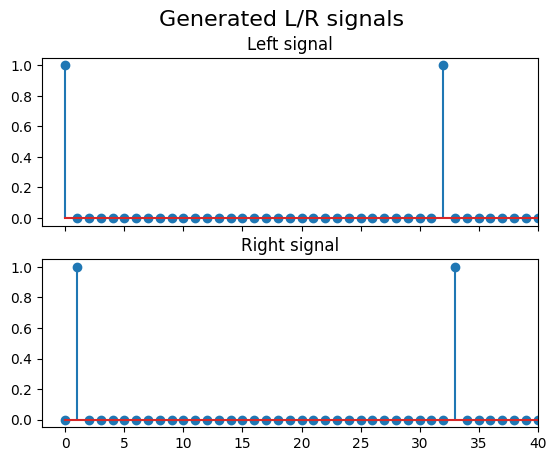

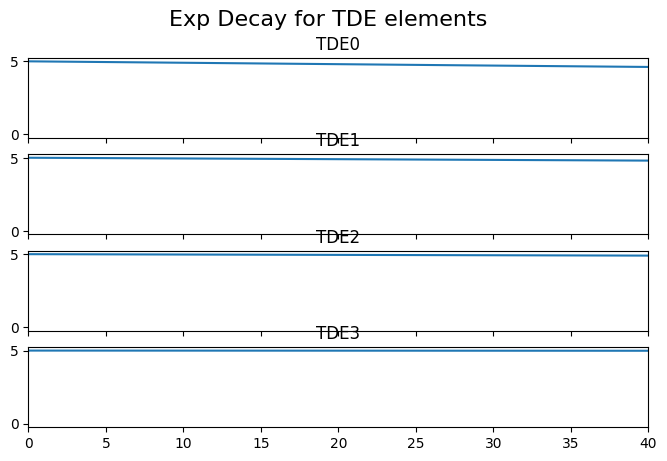

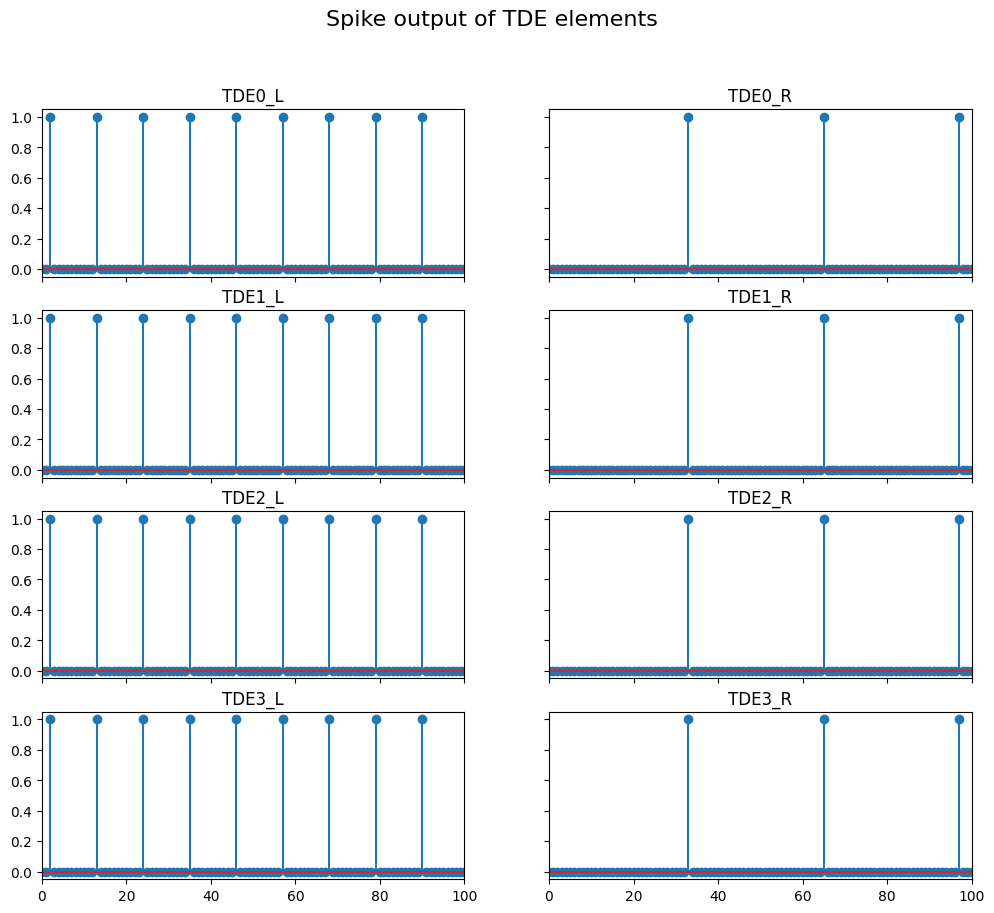

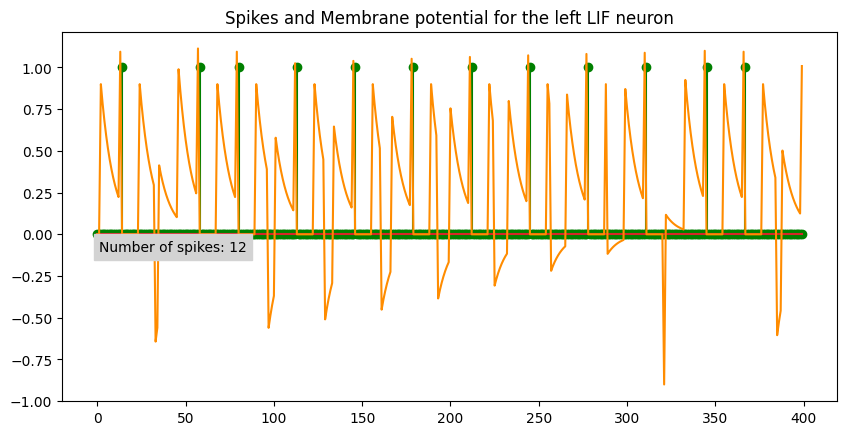

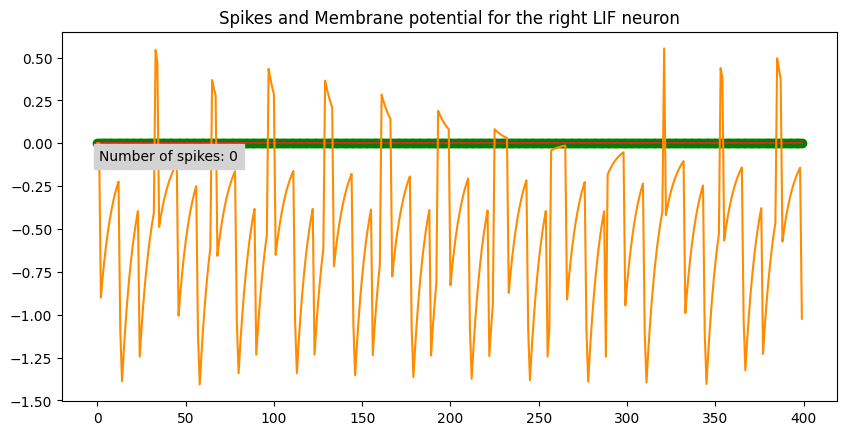

In [12]:
def spike_arr_gen(front_sig, delay_steps, period, num_steps, rand=False):

    signal_left = []
    signal_right = []

    match front_sig.lower():

        case "left":

            if rand:
                for i in range(num_steps):
                    signal_left.append(1) if random.random() >= 0.5 else signal_left.append(0)
            

            else:

                signal_left = np.zeros(num_steps)

                for i in range(num_steps):
                    if i % period == 0:
                        signal_left[i] = 1

            if delay_steps == 0:
                signal_right = signal_left

                return signal_left, signal_right
            

            signal_right = np.zeros(delay_steps)

            signal_right = np.concatenate((signal_right, signal_left))

            signal_right = signal_right[:-delay_steps]



        case "right":

            if rand:
                for i in range(num_steps):
                    signal_right.append(1) if random.random() >= 0.5 else signal_right.append(0)


            else:

                signal_right = np.zeros(num_steps)

                for i in range(num_steps):
                    if i % period == 0:
                        signal_right[i] = 1

            if delay_steps == 0:
                signal_left = signal_right

                return signal_left, signal_right
            

            signal_left = np.zeros(delay_steps)

            signal_left = np.concatenate((signal_left, signal_right))

            signal_left = signal_left[:-delay_steps]



        case _: raise Exception("Invalid entry. Try 'left' or 'right' .")


    return signal_left, signal_right      

ttr1 = TimeToRate(inhib_v=0.6, 
                  excite_v=0.3, 
                  lif_inhib_v=0.5,
                  LIF_params=[0.4, 0.87, 1, 10],
                  main_LIF_params=[3, 0.87, 1, 10],
                  tde_exp_init_val=5, 
                  tde_exp_num_steps= 300,
                  tde_exp_decay_fact=[0.002, 0.001, 0.0005, 0.0000625]                  
                  )

signal_left, signal_right = spike_arr_gen("left", delay_steps=1, period=32, num_steps=400)

# signal_left =  np.concatenate((np.ones(5), np.zeros(10),signal_left))
# signal_right = np.concatenate((np.ones(5),np.zeros(10), signal_right))


spikes_out_L = []
spikes_out_R = []

mem_L_rec = []
mem_R_rec = []

R_tde0_spk = []
R_tde1_spk = []
R_tde2_spk = []
R_tde3_spk = []
L_tde0_spk = []
L_tde1_spk = []
L_tde2_spk = []
L_tde3_spk = []


## Doing calculations one time step at a time
for step in range(np.size(signal_left)):
    ttr1.calculate_step(input_L=signal_left[step], input_R=signal_right[step])
    mem_L_rec.append(ttr1.lif_L.mem)
    mem_R_rec.append(ttr1.lif_R.mem)

    R_tde0_spk.append(ttr1.tde0_R.output)
    R_tde1_spk.append(ttr1.tde1_R.output)
    R_tde2_spk.append(ttr1.tde2_R.output)
    R_tde3_spk.append(ttr1.tde3_R.output)
    L_tde0_spk.append(ttr1.tde0_L.output)
    L_tde1_spk.append(ttr1.tde1_L.output)
    L_tde2_spk.append(ttr1.tde2_L.output)
    L_tde3_spk.append(ttr1.tde3_L.output)

    spikes_out_L.append(ttr1.left_out)
    spikes_out_R.append(ttr1.right_out)



# Plots
step_range = range(np.size(signal_left))

fig, axs = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle("Generated L/R signals", fontsize=16)
axs[0].set_title("Left signal")
axs[0].stem(signal_left)
axs[0].set_xlim([-2, 40])
axs[1].set_title("Right signal")
axs[1].stem(signal_right)
plt.show()

fig, axs = plt.subplots(4, sharex=True, sharey=True)
fig.suptitle("Exp Decay for TDE elements", fontsize=16)
fig.set_figwidth(8, 8)
axs[0].set_title("TDE0")
axs[0].plot(ttr1.tde0_L.exp)
axs[0].set_xlim([0, 40])
axs[1].set_title("TDE1")
axs[1].plot(ttr1.tde1_L.exp)
axs[2].set_title("TDE2")
axs[2].plot(ttr1.tde2_L.exp)
axs[3].set_title("TDE3")
axs[3].plot(ttr1.tde3_L.exp)
# This figure shows the decays for the left population, but are equivalent to those of the right population
plt.show()


## Plots of the spikes from each TDE population
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(12, 10))
fig.suptitle("Spike output of TDE elements", fontsize=16)

axs[0,0].set_title("TDE0_L")
axs[0,0].stem(L_tde0_spk)
axs[0,0].set_xlim([0, 100])
axs[1,0].set_title("TDE1_L")
axs[1,0].stem(L_tde1_spk)
axs[2,0].set_title("TDE2_L")
axs[2,0].stem(L_tde2_spk)
axs[3,0].set_title("TDE3_L")
axs[3,0].stem(L_tde3_spk)
axs[0,1].set_title("TDE0_R")
axs[0,1].stem(R_tde0_spk)
axs[0,1].set_xlim([0, 100])
axs[1,1].set_title("TDE1_R")
axs[1,1].stem(R_tde1_spk)
axs[2,1].set_title("TDE2_R")
axs[2,1].stem(R_tde2_spk)
axs[3,1].set_title("TDE3_R")
axs[3,1].stem(R_tde3_spk)
plt.show()

plt.figure(num=1, figsize=[6.4, 4.8]).set_figwidth(10, 6)
plt.title("Spikes and Membrane potential for the left LIF neuron")
plt.stem(step_range, spikes_out_L, markerfmt="g", linefmt="g")
plt.plot(step_range, mem_L_rec, color="darkorange")
plt.text(x=1, y=-0.1, s=f"Number of spikes: {np.sum(spikes_out_L)}", backgroundcolor="lightgray")
plt.show()

plt.figure(num=2, figsize=[6.4, 4.8]).set_figwidth(10, 6)
plt.title("Spikes and Membrane potential for the right LIF neuron")
plt.stem(step_range , spikes_out_R, markerfmt="g", linefmt="g")
plt.plot(step_range, mem_R_rec, color="darkorange")
plt.text(x=1, y=-0.1, s=f"Number of spikes: {np.sum(spikes_out_R)}", backgroundcolor="lightgray")
plt.show()


(04/04/24)  
Current conclusion is that either something is set up wrong in the Time to Rate class, or the class parameters need a lot of tweaking. I should also probably test with signals that would look like the ones I would be receiving from the NAS, IE periodic signals.

## New attempt at the TTR

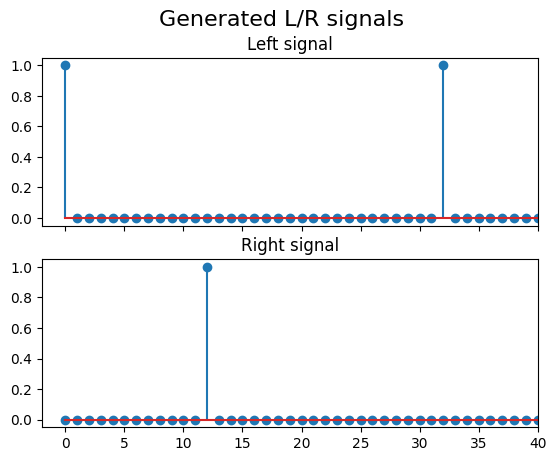

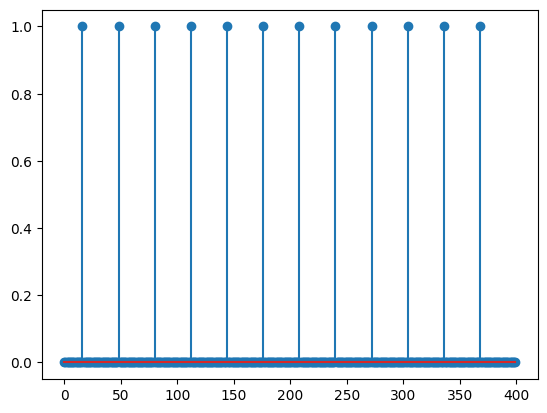

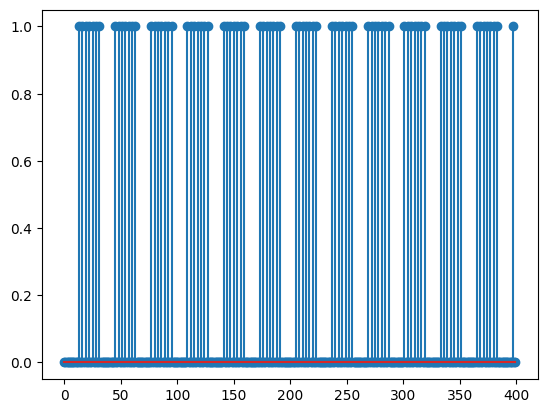

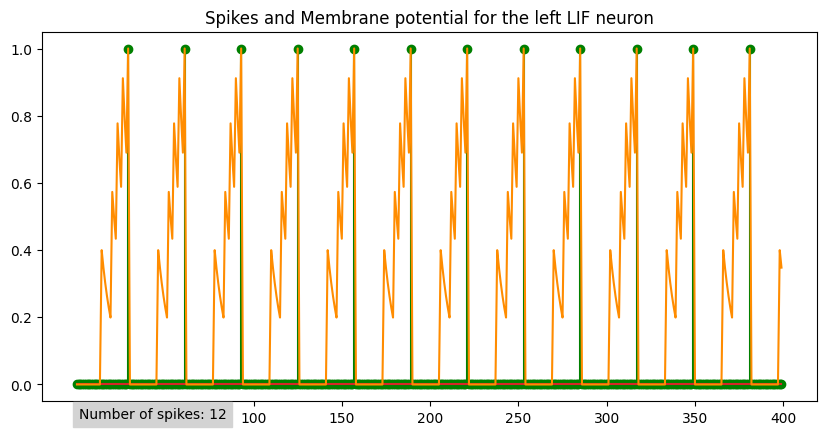

In [65]:
 

signal_left, signal_right = spike_arr_gen("left", delay_steps=12, period=32, num_steps=400)

# signal_left =  np.concatenate((np.ones(5), np.zeros(10),signal_left))
# signal_right = np.concatenate((np.ones(5),np.zeros(10), signal_right))

lifL = LiF(
    params=[0.4,0.87,1,5]
    )

tdeL1 = TDE(
    decay_params=[3,0.1,100],
    LIF_params=[0.4,0.87,1,2]
    )

tdeL2 = TDE(
    decay_params=[3,0.005,100],
    LIF_params=[0.4,0.87,1,2]
    )

spikes_out_L = []
spikes_out_R = []

lif_mem = []

tde1_spk = []

tde2_spk = []


## Doing calculations one time step at a time
for step in range(np.size(signal_left)):
    lif_mem.append(lifL.mem)
    tdeL1.calculate(signal_left[step], signal_right[step])
    tdeL2.calculate(signal_left[step], signal_right[step])
    tde1_spk.append(tdeL1.output)
    tde2_spk.append(tdeL2.output)
    lifL.run_step(input_current = (1*tdeL2.output - 1*tdeL1.output))
    spikes_out_L.append(lifL.spk)
    




# Plots
step_range = range(np.size(signal_left))

fig, axs = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle("Generated L/R signals", fontsize=16)
axs[0].set_title("Left signal")
axs[0].stem(signal_left)
axs[0].set_xlim([-2, 40])
axs[1].set_title("Right signal")
axs[1].stem(signal_right)
plt.show()

plt.stem(tde1_spk)
plt.show()

plt.stem(tde2_spk)
plt.show()

# fig, axs = plt.subplots(4, sharex=True, sharey=True)
# fig.suptitle("Exp Decay for TDE elements", fontsize=16)
# fig.set_figwidth(8, 8)
# axs[0].set_title("TDE0")
# axs[0].plot(ttr1.tde0_L.exp)
# axs[0].set_xlim([0, 40])
# axs[1].set_title("TDE1")
# axs[1].plot(ttr1.tde1_L.exp)
# axs[2].set_title("TDE2")
# axs[2].plot(ttr1.tde2_L.exp)
# axs[3].set_title("TDE3")
# axs[3].plot(ttr1.tde3_L.exp)
# # This figure shows the decays for the left population, but are equivalent to those of the right population
# plt.show()


# ## Plots of the spikes from each TDE population
# fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(12, 10))
# fig.suptitle("Spike output of TDE elements", fontsize=16)

# axs[0,0].set_title("TDE0_L")
# axs[0,0].stem(L_tde0_spk)
# axs[0,0].set_xlim([0, 100])
# axs[1,0].set_title("TDE1_L")
# axs[1,0].stem(L_tde1_spk)
# axs[2,0].set_title("TDE2_L")
# axs[2,0].stem(L_tde2_spk)
# axs[3,0].set_title("TDE3_L")
# axs[3,0].stem(L_tde3_spk)
# axs[0,1].set_title("TDE0_R")
# axs[0,1].stem(R_tde0_spk)
# axs[0,1].set_xlim([0, 100])
# axs[1,1].set_title("TDE1_R")
# axs[1,1].stem(R_tde1_spk)
# axs[2,1].set_title("TDE2_R")
# axs[2,1].stem(R_tde2_spk)
# axs[3,1].set_title("TDE3_R")
# axs[3,1].stem(R_tde3_spk)
# plt.show()

plt.figure(num=1, figsize=[6.4, 4.8]).set_figwidth(10, 6)
plt.title("Spikes and Membrane potential for the left LIF neuron")
plt.stem(step_range, spikes_out_L, markerfmt="g", linefmt="g")
plt.plot(step_range, lif_mem, color="darkorange")
plt.text(x=1, y=-0.1, s=f"Number of spikes: {np.sum(spikes_out_L)}", backgroundcolor="lightgray")
plt.show()

# plt.figure(num=2, figsize=[6.4, 4.8]).set_figwidth(10, 6)
# plt.title("Spikes and Membrane potential for the right LIF neuron")
# plt.stem(step_range , spikes_out_R, markerfmt="g", linefmt="g")
# plt.plot(step_range, mem_R_rec, color="darkorange")
# plt.text(x=1, y=-0.1, s=f"Number of spikes: {np.sum(spikes_out_R)}", backgroundcolor="lightgray")
# plt.show()
